In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [27]:
corr_closing_df = pd.read_csv('correlation_data/correlation_log_diff_CH_CLOSING_PRICE.csv')

In [28]:
corr_closing_df.columns

Index(['FILENAME1', 'FILENAME2', 'CORRELATION'], dtype='object')

In [29]:
corr_closing_df.describe()

,CORRELATION
count,40000.000000
mean,0.197593
std,0.152392
min,-0.357092
25%,0.083244
50%,0.199887
75%,0.294395
max,1.000000


In [30]:
G = nx.Graph()

In [31]:
nodes = set(corr_closing_df['FILENAME1'].unique()) | set(corr_closing_df['FILENAME2'].unique())
G.add_nodes_from(nodes)

In [32]:
for _, row in corr_closing_df.iterrows():
    weight=row['CORRELATION']
    if row['FILENAME1'] != row['FILENAME2']:
        G.add_edge(row['FILENAME1'], row['FILENAME2'], weight=weight)


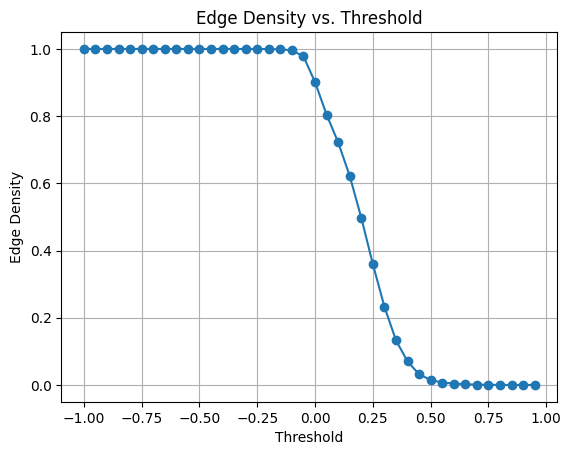

In [33]:
thresholds = np.arange(-1, 1, 0.05)  # Stops before 0.95 to avoid exceeding 0.9
edge_densities = []

for thresh in thresholds:
    filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > thresh]
    edge_density = len(filtered_edges) / (len(nodes) * (len(nodes) - 1) / 2)  # Formula for edge density
    edge_densities.append(edge_density)

plt.plot(thresholds, edge_densities, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Edge Density')
plt.title('Edge Density vs. Threshold')
plt.grid(True)
plt.show()

In [42]:
# Used this paper https://www.sciencedirect.com/science/article/pii/S0378437111004808#s000020
threshold = 0.25
filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > threshold]
edge_density = len(filtered_edges) / (len(nodes) * (len(nodes) - 1) / 2)  # Formula for edge density
print(edge_density)

0.35954773869346734


In [35]:
G = nx.Graph()
nodes = set(corr_closing_df['FILENAME1'].unique()) | set(corr_closing_df['FILENAME2'].unique())
G.add_nodes_from(nodes)
for _, row in corr_closing_df.iterrows():
    weight=row['CORRELATION']
    if weight > threshold and row['FILENAME1'] != row['FILENAME2']:
        G.add_edge(row['FILENAME1'], row['FILENAME2'], weight=weight)


In [37]:
# Calculate the degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the betweenness centrality in descending order
for node, centrality in sorted_degree_centrality[:5]:
    print(f"Node {node}: Degree Centrality = {centrality:.4f}")

Node DLF: Degree Centrality = 0.7387
Node FEDERALBNK: Degree Centrality = 0.7387
Node L%26TFH: Degree Centrality = 0.7286
Node IDFCFIRSTB: Degree Centrality = 0.7186
Node LT: Degree Centrality = 0.6985


In [38]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the betweenness centrality in descending order
for node, centrality in sorted_betweenness[:5]:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")

Node SAIL: Betweenness Centrality = 0.0152
Node MARUTI: Betweenness Centrality = 0.0127
Node FEDERALBNK: Betweenness Centrality = 0.0113
Node TATACONSUM: Betweenness Centrality = 0.0102
Node DLF: Betweenness Centrality = 0.0095


In [39]:
# Calculate the Page Rank
pagerank = nx.pagerank(G, max_iter=2000)

# Sort the Page Rank values in descending order
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the Page Rank in descending order
for node, centrality in sorted_pagerank[:5]:
    print(f"Node {node}: Pagerank = {centrality:.4f}")

Node FEDERALBNK: Pagerank = 0.0111
Node L%26TFH: Pagerank = 0.0109
Node DLF: Pagerank = 0.0109
Node IDFCFIRSTB: Pagerank = 0.0105
Node SBIN: Pagerank = 0.0102


In [40]:
# Calculate the eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort the eigenvector centrality values in descending order
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the eigenvector centrality in descending order
for node, centrality in sorted_eigenvector[:5]:
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f}")

Node DLF: Eigenvector Centrality = 0.1079
Node L%26TFH: Eigenvector Centrality = 0.1075
Node FEDERALBNK: Eigenvector Centrality = 0.1068
Node LT: Eigenvector Centrality = 0.1056
Node IDFCFIRSTB: Eigenvector Centrality = 0.1054


In [41]:
# # Extract a subgraph with only 10 nodes
# nodes_to_visualize = list(nodes)[:20]
# subgraph = G.subgraph(nodes_to_visualize)

# # Draw the subgraph
# pos = nx.spring_layout(subgraph)  # Positioning the nodes using a spring layout
# nx.draw(subgraph, pos, with_labels=True, node_size = 1500)
# edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in subgraph.edges(data='weight')}
# nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

# # Show the graph
# plt.title('Subgraph with 10 Nodes and Correlation Weights')
# plt.show()